In [1]:
# Core
import datetime
import os
import glob
import tempfile
import sys
import pickle
import copy

# Analysis 
import numpy as np
import pandas as pd
import xarray as xr

# Plotting
import matplotlib.pyplot as plt

# Debugging 
import pdb, traceback
%load_ext line_profiler

# Radar Tools
import pyart
import tint
from tint import animate

# CPOL convenience functions
import CPOL_func as cf


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



/home/563/esh563/pyart/pyart/graph/cm.py:104: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'red' in spec:
/home/563/esh563/pyart/pyart/graph/cm_colorblind.py:32: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'red' in spec:


In [14]:
filenames = cf.load_wet_seasons(years=list(range(2001,2016)))

Gathering files.
Gathering files.
Gathering files.
Gathering files.
Gathering files.
Gathering files.
Gathering files.
Gathering files.
Gathering files.
Gathering files.
Gathering files.
Gathering files.
Gathering files.


In [13]:
del tracks_obj

In [2]:
# def test():
filenames = cf.CPOL_files_from_datetime_list(
    np.arange(np.datetime64('2006-02-10 09:00'), 
              np.datetime64('2006-02-10 16:00'), 
              np.timedelta64(10, 'm'))
)[0]

# Generate grid generator 
# Note generators produce iterators
# These are alternative to using lists and looping
grids = (pyart.io.read_grid(fn, include_fields = 'reflectivity')
         for fn in filenames)

with open('/g/data/w40/esh563/CPOL_analysis/TINT_tracks/circ_b_ind_set.pkl', 
          'rb') as f:
    b_ind_set = pickle.load(f)

# Define settings for tracking
settings = {
    'MIN_SIZE' : [40, 400, 800], # square km
    'FIELD_THRESH' : ['convective', 20, 15], # DbZ
    'ISO_THRESH' : [10, 10, 10], # DbZ
    'GS_ALT' : 3000,
    'SEARCH_MARGIN' : 10000, # m. This is just for object matching step:
    # does not affect flow vectors.
    'FLOW_MARGIN' : 40000, # m. Margin around object over which to
    # perform phase correlation.
    'LEVELS' : np.array( # m
        [[3000, 3500], 
         [3500, 7500],
         [7500, 10000]]
    ),
    'TRACK_INTERVAL' : 0,
    'BOUNDARY_GRID_CELLS' : b_ind_set,
    'UPDRAFT_START': 3000
}

tracks_obj  = tint.Cell_tracks()

for parameter in ['MIN_SIZE', 'FIELD_THRESH', 'GS_ALT', 'LEVELS', 
                  'TRACK_INTERVAL', 'ISO_THRESH', 'SEARCH_MARGIN',
                  'FLOW_MARGIN', 'BOUNDARY_GRID_CELLS', 'UPDRAFT_START'
                 ]:
    tracks_obj.params[parameter] = settings[parameter]

# Calculate tracks
# %lprun -T lprof0 -f get_filtered_frame_steiner tracks_obj.get_tracks(grids)
tracks_obj.get_tracks(grids)
tracks_obj = cf.get_reanalysis_vars(tracks_obj)

# Create directory for figures
dt=str(datetime.datetime.now())[0:-7]
dt=dt.replace(" ", "_")
dt=dt.replace(":", "_")
dt=dt.replace("-", "")

out_file_name = ('/g/data/w40/esh563/CPOL_analysis/TINT_tracks/'
                 + 'tracks_obj_test.pkl'.format(dt))

with open(out_file_name, 'wb') as f:
    pickle.dump(tracks_obj, f)
        
#     return tracks_obj
        
# if __name__ == '__main__':
#     try:
#         tracks_obj = test()
#     except:
#         extype, value, tb = sys.exc_info()
#         traceback.print_exc()
#         pdb.post_mortem(tb)
        
# print(open('lprof0', 'r').read())

Gathering files.
Calculating additional tracks properties.
Calculating system tracks.


Time elapsed: 0.2 minutes
Adding data from Monash Reanalysis


In [5]:
tracks_obj.tracks

grid_x    grid_y     com_x     com_y  \
scan time                level uid                                           
0    2006-02-10 09:00:09 0     0    115967.2  -25948.9  116705.2  -25398.7   
                         1     0    117743.2  -25963.0  117656.1  -25886.2   
                         2     0    121468.1  -22868.6  120027.1  -24950.3   
1    2006-02-10 09:10:10 0     0    114187.5  -20958.3  114810.9  -20839.0   
                         1     0    117699.0  -22460.2  117123.8  -21742.6   
                         2     0    120770.0  -19589.3  120028.0  -21770.7   
2    2006-02-10 09:20:09 0     0    111052.6  -18627.8  111452.4  -18433.7   
                               1     55523.3 -124302.3   55198.3 -124479.3   
                         1     0    117022.4  -18641.8  115471.5  -18732.8   
                               1     54598.8 -119598.8   54816.6 -120789.8   
                         2     0    119243.7  -16449.9  118435.5  -17938.5   
                               1     58880.4 -112408.0   55818.2 -117438.7   
3    2006-02-10 09:30:08 0     0    104533.3  -17333.3  105147.0  -16899.1   
                               1     49743.6 -120320.5   49897.4 -120738.3   
                         1     0    113072.5  -15260.9  110028.1  -16987.4   
                               1     51195.7 -120679.3   51072.4 -121083.9   
                         2     0    116689.1  -13819.3  115639.5  -15045.6   
                               1     55555.6 -112160.5   53720.9 -115024.1   
4    2006-02-10 09:40:08 0     0     98390.4  -17448.6   98899.9  -16986.2   
                               1     42596.2 -129519.2   42852.5 -129686.4   
                         1     0    108652.8  -14162.2  104969.0  -16351.6   
                               1     46718.8 -120546.9   45767.8 -123059.8   
                         2     0    114608.3  -12319.5  112994.9  -13251.3   
                               1     50786.1 -114149.5   49046.2 -116575.7   
5    2006-02-10 09:50:08 0     0     92610.1  -18081.8   93092.1  -17616.5   
                               1     40367.6 -129338.2   40324.2 -129377.5   
                         1     0    106849.0  -25366.2  102537.8  -26440.1   
                               1     41691.2 -121421.6   40442.9 -124796.0   
                         2     0    110575.0  -22897.2  109444.3  -22547.7   
                               1     45418.4 -114010.2   43982.2 -116750.5   
...                                      ...       ...       ...       ...   
30   2006-02-10 14:00:09 0     1    -89956.9  -48060.3  -90122.8  -47349.7   
                         1     1    -40962.8  -49319.8  -46600.3  -50086.7   
                         2     1    -37419.1  -48577.0  -38665.3  -49959.8   
31   2006-02-10 14:10:10 0     1    -96854.8  -41532.3  -97269.8  -41381.4   
                         1     1    -43832.7  -46136.0  -48757.6  -47071.4   
                         2     1    -40491.2  -44780.5  -41290.5  -45841.7   
32   2006-02-10 14:20:09 0     1    -98846.2  -39423.1  -99487.1  -39464.1   
                         1     1    -47604.8  -45643.1  -53412.9  -46130.0   
                         2     1    -46419.4  -44539.2  -47831.6  -46388.8   
33   2006-02-10 14:30:09 0     1   -102321.4  -42678.6 -102487.6  -42726.0   
                         1     1    -53855.9  -45994.6  -60444.5  -46000.3   
                         2     1    -55513.0  -47628.2  -55157.7  -47669.7   
34   2006-02-10 14:40:09 0     3    -72500.0  -37500.0  -72132.6  -36973.3   
                         1     3    -54255.1  -44023.8  -60496.7  -42757.4   
                         2     3    -59071.2  -47442.7  -58695.0  -46936.1   
35   2006-02-10 14:50:09 0     4    -58484.8  -25151.5  -58733.5  -25331.9   
                         1     4    -58355.1  -41771.2  -65639.3  -40862.5   
                         2     4    -62138.3  -46085.2  -61318.1  -44879.6   
36   2006-02-10 15:00:08 0     4    -81774.2  -45483.9  -821

In [ ]:
del tracks_obj

In [2]:
with open('/g/data/w40/esh563/CPOL_analysis/TINT_tracks/tracks_obj_test.pkl', 'rb') as f:
    tracks_obj = pickle.load(f)

In [3]:
tracks_obj = cf.get_reanalysis_vars(tracks_obj)

Gathering files.
Animating from 2006-02-10T10:00 to 2006-02-10T10:50.


Traceback (most recent call last):
  File "/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.04/lib/python3.6/site-packages/pandas/core/indexes/base.py", line 4381, in get_value
    return libindex.get_value_box(s, key)
  File "pandas/_libs/index.pyx", line 52, in pandas._libs.index.get_value_box
  File "pandas/_libs/index.pyx", line 48, in pandas._libs.index.get_value_at
  File "pandas/_libs/util.pxd", line 113, in pandas._libs.util.get_value_at
  File "pandas/_libs/util.pxd", line 98, in pandas._libs.util.validate_indexer
TypeError: 'str' object cannot be interpreted as an integer

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "<ipython-input-3-c6117c2b9d72>", line 48, in <module>
    test()
  File "<ipython-input-3-c6117c2b9d72>", line 44, in test
    plot_shear_vec=True)
  File "/home/563/esh563/TINT/tint/visualization.py", line 1008, in animate
    **kwargs)
  File "/home/563/esh563/TINT/tint/visualization.py", l

> /home/563/esh563/CPOL_analysis/pandas/_libs/hashtable_class_helper.pxi(1608)pandas._libs.hashtable.PyObjectHashTable.get_item()
(Pdb) q


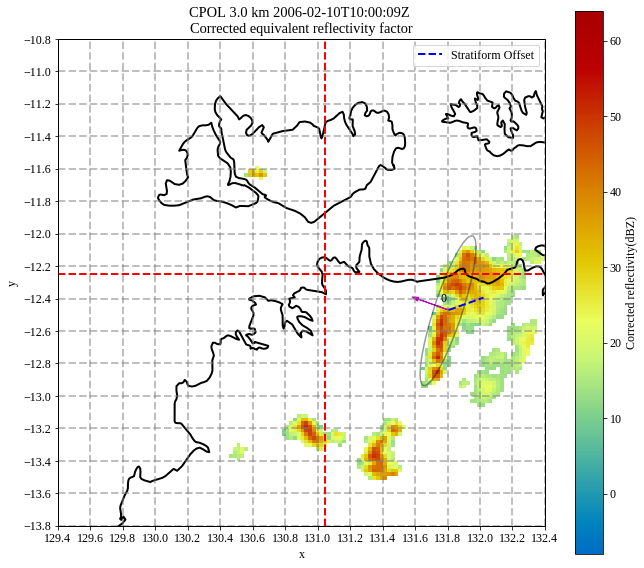

In [3]:
def test():
    lon_min = 131.0 - 1.6
    lon_max = 131.0 + 1.6

    lat_max = -12.2 + 1.6
    lat_min = -12.2 - 1.6

    [filenames, start_time, end_time] = cf.CPOL_files_from_datetime_list(
        np.arange(np.datetime64('2006-02-10 10:00'), 
                  np.datetime64('2006-02-10 11:00'), 
                  np.timedelta64(10, 'm'))
    )
    
    tracks_obj_temp = copy.deepcopy(tracks_obj)
#     tracks_obj_temp.tracks = tracks_obj_temp.tracks[sub_cond]
#     tracks_obj_temp.system_tracks = tracks_obj_temp.system_tracks[sub_cond_sys]
    
#     filenames, start_time, end_time = cf.CPOL_files_from_TINT_obj(
#         tracks_obj_temp, '7079'
#     )

    # Generate grid generator 
    # Note generators produce iterators
    # These are alternative to using lists and looping
    grids = (pyart.io.read_grid(fn, include_fields = 'reflectivity')
             for fn in filenames)

    # Create directory for figures
    dt=str(datetime.datetime.now())[0:-7]
    dt=dt.replace(" ", "_")
    dt=dt.replace(":", "_")
    dt=dt.replace("-", "")

    base_path = '/g/data/w40/esh563/CPOL_analysis/figures/TINT/'
    out_path = base_path + dt + '_tint_CPOL_anim'

    animate(tracks_obj_temp, grids, out_path,
            start_datetime = start_time,
            end_datetime = end_time,
            lat_lines=np.arange(lat_min, lat_max, .2),
            lon_lines=np.arange(lon_min, lon_max, .2),
            tracers=False, keep_frames=False, dpi=100, alt_low=3000,
            alt_high=9500, scan_boundary=False, ellipses=True,
            plot_shear_vec=True)
    
if __name__ == '__main__':
    try:
        test()
    except:
        extype, value, tb = sys.exc_info()
        traceback.print_exc()
        pdb.post_mortem(tb)

In [11]:
va = xr.open_dataset('/g/data/ua8/Martin/va_analysis/syn599/CPOL_large-scale_forcing.nc')
va.time[-1]

<xarray.DataArray 'time' ()>
array('2015-04-14T12:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 2015-04-14T12:00:00
Attributes:
    axis:       T
    long_name:  time

In [17]:
def test():
    uid = '13750'

#     filenames, start_time, end_time = cf.CPOL_files_from_TINT_obj(
#         tracks_obj, uid
#     )
    
    [filenames, start_time, end_time] = cf.CPOL_files_from_datetime_list(
        np.arange(np.datetime64('2006-01-06 06:20'), 
        np.datetime64('2006-01-06 07:10'), 
        np.timedelta64(10, 'm')))

    grids = (pyart.io.read_grid(fn) for fn in filenames)  # refresh grid generator

    # Create directory for figures
    dt=str(datetime.datetime.now())[0:-7]
    dt=dt.replace(" ", "_")
    dt=dt.replace(":", "_")
    dt=dt.replace("-", "")
    
    base_path = '/g/data/w40/esh563/CPOL_analysis/figures/TINT/'
    out_path = base_path + dt + '_tint_CPOL_lagrangian'
    animate(tracks_obj, grids, out_path, style='updraft', uid=uid, 
            alt_low=3000, alt_high=10000, keep_frames=False, dpi=100)
    
if __name__ == '__main__':
    try:
        test()
    except:
        extype, value, tb = sys.exc_info()
        traceback.print_exc()
        pdb.post_mortem(tb)

Gathering files.
Animating 43 frames
Object not yet initiated at 2006-01-06T06:20:09.
Moving to next grid.
Object not yet initiated at 2006-01-06T06:30:09.
Moving to next grid.
Object not yet initiated at 2006-01-06T06:40:09.
Moving to next grid.
Object not yet initiated at 2006-01-06T06:50:09.
Moving to next grid.
Object not yet initiated at 2006-01-06T07:00:09.
Moving to next grid.
Grid generator is empty.


In [5]:
# Let's filter by tilt direction and magnitude, velocity magnitude
# and significant area.
eastward_motion = (tracks_obj.system_tracks['u_shift'] > 5)
forward_tilt = ((-45 <= tracks_obj.system_tracks['sys_rel_tilt_dir'])
                & (tracks_obj.system_tracks['sys_rel_tilt_dir'] <= 45))
backward_tilt = ((-135 >= tracks_obj.system_tracks['sys_rel_tilt_dir'])
                | (tracks_obj.system_tracks['sys_rel_tilt_dir'] >= 135))
left_tilt = ((45 <= tracks_obj.system_tracks['sys_rel_tilt_dir'])
                & (tracks_obj.system_tracks['sys_rel_tilt_dir'] <= 135))
right_tilt = ((-135 <= tracks_obj.system_tracks['sys_rel_tilt_dir'])
                & (tracks_obj.system_tracks['sys_rel_tilt_dir'] <= -45))
downshear_motion = ((-45 <= tracks_obj.system_tracks['shear_rel_sys_dir'])
                & (tracks_obj.system_tracks['shear_rel_sys_dir'] <= 45))
upshear_motion = ((-135 >= tracks_obj.system_tracks['shear_rel_sys_dir'])
                 | (tracks_obj.system_tracks['shear_rel_sys_dir'] >= 135))
sig_shear_mag = (tracks_obj.system_tracks['shear_mag'] >= 2)
sig_tilt_mag = (tracks_obj.system_tracks['tilt_mag'] >= 20000)
vel_mag = np.sqrt(tracks_obj.system_tracks['u']**2 
                  + tracks_obj.system_tracks['v']**2)
sig_vel_mag = ((vel_mag >= 5) & (vel_mag <= 40))
eccentricity_mag = tracks_obj.system_tracks['eccentricity'] > .85
# Note for CPOL 2.5 km, total scan area is only 66052 km^2. This makes 
# traditional MCS definitions of area > 30000 km^2 difficult to apply, 
# and still coherently calculate tilt. 
sig_area = ((tracks_obj.system_tracks['proj_area'] >= 4000) & 
            (tracks_obj.system_tracks['proj_area'] <= 50000))
not_border = (tracks_obj.system_tracks['touch_border']*6.25 / tracks_obj.system_tracks['proj_area']) < 0.01

tracks_0 = tracks_obj.tracks[['touch_border', 'proj_area']].xs(
    0, level='level'
)
not_border_0 = (tracks_0['touch_border'] * 6.25 / tracks_0['proj_area']) < 0.01

In [6]:
# Let's find the cells that were tracked for the most frames.
sub_cond_sys = sig_tilt_mag & sig_vel_mag & sig_area & not_border & not_border_0 & sig_shear_mag & upshear_motion
sub_cond = sub_cond_sys.append([sub_cond_sys]*2).sort_index(sort_remaining=True)
levels = np.array([0,1,2]*len(sub_cond_sys))

sub_cond = sub_cond.to_frame()
sub_cond.insert(0, 'level', levels)
sub_cond = sub_cond.reset_index()

sub_cond = sub_cond.set_index(['scan', 'time', 'level', 'uid'])
sub_cond = sub_cond.ix[:,0]
# tracks_obj.tracks[sub_cond]
tracks_obj.system_tracks[sub_cond_sys].groupby(level='uid').size().sort_values(ascending=False)[:20]

uid
13235    17
7079      7
13536     6
14696     5
5706      5
8215      5
8751      4
8233      4
14691     4
5662      4
8231      3
3688      3
13245     3
13016     3
14427     3
13065     3
9907      2
3554      2
5413      2
13313     2
dtype: int64

In [14]:
tracks_obj.system_tracks[sub_cond_sys].xs('5732', level='uid')['proj_area']

scan   time               
52165  2003-01-24 17:50:00    12137.50
52166  2003-01-24 18:00:00    12118.75
52167  2003-01-24 18:10:03    11450.00
52169  2003-01-24 18:30:01    10712.50
52171  2003-01-24 18:50:00     9662.50
52172  2003-01-24 19:00:00     8337.50
52173  2003-01-24 19:10:03     4225.00
Name: proj_area, dtype: float64

# Calculate Some Statistics

In [34]:
subset_logic = sig_area & not_border & sig_vel_mag & sig_tilt_mag & not_border_0 & eccentricity_mag

sub_tracks = tracks_obj.system_tracks[subset_logic]
sub_uids = list(sorted(set([int(sub_tracks.index.values[i][2]) for i in range(len(sub_tracks))])))
sub_uids = [str(i) for i in sub_uids]

MCS_lengths = [len(sub_tracks.xs(i, level='uid').reset_index(level='time').index.values) for i in sub_uids]

max_MCS = max(MCS_lengths)

# Create 3 lists with lengths the lifetime of longest object.
[TS, LS, PS] = [np.zeros(80) for i in range(3)]

for i in sub_uids:
    obj = sub_tracks.xs(i, level='uid').reset_index(level='time')
    scans = obj.index.values
    scan_label = scans - min(scans)
    tilts = obj['sys_rel_tilt_dir']

    forward_tilt = ((-45 <= tilts) & (tilts <= 45))
    backward_tilt = ((-135 >= tilts) | (tilts >= 135))

    fwd_inds = scan_label[np.argwhere(forward_tilt).flatten().tolist()].tolist()
    bwd_inds = scan_label[np.argwhere(backward_tilt).flatten().tolist()].tolist()
    pll_inds = scan_label[np.argwhere(~backward_tilt & ~forward_tilt).flatten().tolist()].tolist()

    TS[bwd_inds] += 1
    LS[fwd_inds] += 1
    PS[pll_inds] += 1

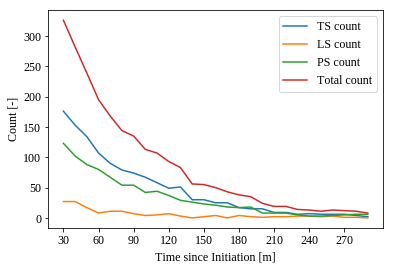

In [35]:
plt.plot(np.arange(30,300,10), TS[3:30], label='TS count')
plt.plot(np.arange(30,300,10), LS[3:30], label='LS count')
plt.plot(np.arange(30,300,10), PS[3:30], label='PS count')
plt.plot(np.arange(30,300,10), (TS+PS+LS)[3:30], label='Total count')
plt.xticks(np.arange(30,300,30))
plt.ylabel('Count [-]')
plt.xlabel('Time since Initiation [m]')
plt.legend()
plt.savefig('/g/data/w40/esh563/CPOL_analysis/figures/TINT/counts.png')

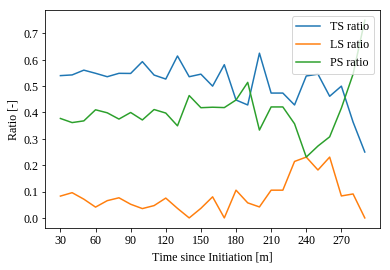

In [36]:
tot = (TS+PS+LS)

plt.plot(np.arange(30,300,10), (TS/tot)[3:30], label='TS ratio')
plt.plot(np.arange(30,300,10), (LS/tot)[3:30], label='LS ratio')
plt.plot(np.arange(30,300,10), (PS/tot)[3:30], label='PS ratio')
plt.xticks(np.arange(30,300,30))
plt.ylabel('Ratio [-]')
plt.xlabel('Time since Initiation [m]')
plt.legend()
# Note that we don't really know the start times of the systems!
plt.savefig('/g/data/w40/esh563/CPOL_analysis/figures/TINT/ratios.png')